<a href="https://colab.research.google.com/github/B-A-L-H-A-K-A/Premier-League/blob/main/Premier_League_2010_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Premier League 2010-2022
 ## Computing for Economics and Business 
 ### Professor: João Rala Cordeiro
 #### André da Paz Henriques Amado | 109815
 #### 2022/2023
 #### ISCTE - IUL
 #### https://www.kaggle.com/datasets/ziadahmedmohamed/premier-league-2010-2022?select=2022.csv

####INTRODUCTION
The Premier League is the most popular and competitive football league in the world. Between the years 2010 and 2022, the competition had a variety of winning teams, from the traditional Manchester United to the surprising Leicester City. In this data analysis, we'll examine how teams perform in terms of goals scored, points earned, and other key stats. We'll also look at how teams have evolved over time.







<img src="https://img.theculturetrip.com/1440x807/smart/wp-content/uploads/2016/08/premier_league_rebrands_designstudio_01.jpg">

- Year
- Pos: Position at the end of the season
- Team
- City: Team City
- W: Number of Wins at the end of the season
- D: Number of Draws at the end of the season
- L: Number of Loses at the end of the season
- GF: Goals Scored at the end of the season
- GA: Goals Conceded at the end of the season
- GD: Goals Difference at the end of the season
- Pts: Points at the end of the season

# Data Handling

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


In [66]:
dfs = []

for year in range(2010, 2023):
    path = f'{year}.csv'
    df = pd.read_csv(path, sep=',', header=0)
    df.insert(loc=0, column='year', value=year)
    dfs.append(df)

PL = pd.concat(dfs)
PL = PL.reset_index(drop=True)

In [67]:
print(PL)

     year  Pos               Team   W   D   L   GF  GA   GD  Pts
0    2010    1           Chelsea   27   5   6  103  32  +71   86
1    2010    2  Manchester United  27   4   7   86  28  +58   85
2    2010    3            Arsenal  23   6   9   83  41  +42   75
3    2010    4  Tottenham Hotspur  21   7  10   67  41  +26   70
4    2010    5    Manchester City  18  13   7   73  45  +28   67
..    ...  ...                ...  ..  ..  ..  ...  ..  ...  ...
255  2022   16            Everton  11   6  21   43  66  ?23   39
256  2022   17       Leeds United   9  11  18   42  79  ?37   38
257  2022   18           Burnley    7  14  17   34  53  ?19   35
258  2022   19           Watford    6   5  27   34  77  ?43   23
259  2022   20      Norwich City    5   7  26   23  84  ?61   22

[260 rows x 10 columns]


In [68]:
#remove the space before and after teams names
PL['Team'] = PL['Team'].str.strip()

In [69]:
#replace '?' for '-'
PL['GD'] = PL['GD'].str.replace('?', '-', regex=False)

In [70]:
print(PL)

     year  Pos               Team   W   D   L   GF  GA   GD  Pts
0    2010    1            Chelsea  27   5   6  103  32  +71   86
1    2010    2  Manchester United  27   4   7   86  28  +58   85
2    2010    3            Arsenal  23   6   9   83  41  +42   75
3    2010    4  Tottenham Hotspur  21   7  10   67  41  +26   70
4    2010    5    Manchester City  18  13   7   73  45  +28   67
..    ...  ...                ...  ..  ..  ..  ...  ..  ...  ...
255  2022   16            Everton  11   6  21   43  66  -23   39
256  2022   17       Leeds United   9  11  18   42  79  -37   38
257  2022   18            Burnley   7  14  17   34  53  -19   35
258  2022   19            Watford   6   5  27   34  77  -43   23
259  2022   20       Norwich City   5   7  26   23  84  -61   22

[260 rows x 10 columns]


In [71]:
#confirm if there are any null in PL db
PL.isna().sum()

year    0
Pos     0
Team    0
W       0
D       0
L       0
GF      0
GA      0
GD      0
Pts     0
dtype: int64

# Data Analysis

# Teams

In [72]:
#see all teams that played in the premier league in the seasons between 2010 and 2022
team_list = PL['Team'].tolist()
print(team_list)

['Chelsea', 'Manchester United', 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Aston Villa', 'Liverpool', 'Everton', 'Birmingham City', 'Blackburn Rovers', 'Stoke City', 'Fulham', 'Sunderland', 'Bolton Wanderers', 'Wolverhampton Wanderers', 'Wigan Athletic', 'West Ham United', 'Burnley', 'Hull City', 'Portsmouth', 'Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Everton', 'Fulham', 'Aston Villa', 'Sunderland', 'West Bromwich Albion', 'Newcastle United', 'Stoke City', 'Bolton Wanderers', 'Blackburn Rovers', 'Wigan Athletic', 'Wolverhampton Wanderers', 'Birmingham City', 'Blackpool', 'West Ham United', 'Manchester City', 'Manchester United', 'Arsenal', 'Tottenham Hotspur', 'Newcastle United', 'Chelsea', 'Everton', 'Liverpool', 'Fulham', 'West Bromwich Albion', 'Swansea City', 'Norwich City', 'Sunderland', 'Stoke City', 'Wigan Athletic', 'Aston Villa', 'Queens Park Rangers', 'Bolton Wanderers', 'Blackburn Rovers', 'Wolverhampton Wander

In [73]:
#unique teams
PL_Teams = PL['Team'].unique()
print(PL_Teams)

['Chelsea' 'Manchester United' 'Arsenal' 'Tottenham Hotspur'
 'Manchester City' 'Aston Villa' 'Liverpool' 'Everton' 'Birmingham City'
 'Blackburn Rovers' 'Stoke City' 'Fulham' 'Sunderland' 'Bolton Wanderers'
 'Wolverhampton Wanderers' 'Wigan Athletic' 'West Ham United' 'Burnley'
 'Hull City' 'Portsmouth' 'West Bromwich Albion' 'Newcastle United'
 'Blackpool' 'Swansea City' 'Norwich City' 'Queens Park Rangers'
 'Southampton' 'Reading' 'Crystal Palace' 'Cardiff City' 'Leicester City'
 'Watford' 'Bournemouth' 'Middlesbrough' 'Brighton & Hove Albion'
 'Huddersfield Town' 'Sheffield United' 'Leeds United' 'Brentford']


In [74]:
#sort unique teams
SortedTeams = sorted(PL_Teams)
print(SortedTeams)

['Arsenal', 'Aston Villa', 'Birmingham City', 'Blackburn Rovers', 'Blackpool', 'Bolton Wanderers', 'Bournemouth', 'Brentford', 'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town', 'Hull City', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Middlesbrough', 'Newcastle United', 'Norwich City', 'Portsmouth', 'Queens Park Rangers', 'Reading', 'Sheffield United', 'Southampton', 'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur', 'Watford', 'West Bromwich Albion', 'West Ham United', 'Wigan Athletic', 'Wolverhampton Wanderers']


In [75]:
#total number of teams in Premier League during the years
num_teams = PL["Team"].nunique()
print(f"There are {num_teams} different teams.")

There are 39 different teams.


In [76]:
#search for all occurrences of the word "United" in the "Team" column
PL[PL['Team'].str.contains(r'United')]

#if i wanna see wht i have string ='United' AND when this string have Pos==1
#PL_United1 = PL[(PL['Team'].str.contains(r'United')) & (PL['Pos'] == 1)]
#print(PL_United1)

,year,Pos,Team,W,D,L,GF,GA,GD,Pts
1,2010,2,Manchester United,27,4,7,86,28,+58,85
16,2010,17,West Ham United,8,11,19,47,66,-19,35
20,2011,1,Manchester United,23,11,4,78,37,+41,80
31,2011,12,Newcastle United,11,13,14,56,57,-1,46
39,2011,20,West Ham United,7,12,19,43,70,-27,33
41,2012,2,Manchester United,28,5,5,89,33,+56,89
44,2012,5,Newcastle United,19,8,11,56,51,+5,65
60,2013,1,Manchester United,28,5,5,86,43,+43,89
69,2013,10,West Ham United,12,10,16,45,53,-8,46
75,2013,16,Newcastle United,11,8,19,45,68,-23,41


### Question 1 - How many teams passed in the premier league over these years?
##### Realizing which ones never dropped from a division and which ones did and went up to understand the years they were in the premier league.

In [77]:
#teams that are always in the premier league
PLallYears = PL['Team'].value_counts()[PL['Team'].value_counts() == 13].index.tolist()
for team in PLallYears:
    print(team)

Chelsea
Arsenal
Tottenham Hotspur
Manchester City
Liverpool
Everton
Manchester United


In [78]:
#in addition to the teams that are always in the premier league, which other teams were there and in what year were they

all_years = np.arange(2010, 2023).tolist()
teams_by_year = {}

#see each year which teams are present
for year in all_years:
    teams_for_year = PL.loc[PL["year"] == year, "Team"].unique()
    
    for team in teams_for_year:
        if team not in teams_by_year:
            teams_by_year[team] = []
        teams_by_year[team].append(year)
        
#verify wich teams are not always in Premier League
teams_not_present = set()
for team, years in teams_by_year.items():
    # Confirm if those teams dont appear all years
    if not all(year in years for year in all_years):
        teams_not_present.add(team)

print("Unmatched Teams in All Years and Matched Years:")
for team in sorted(teams_not_present):
    print(f"{team}: {teams_by_year[team]}") 

Unmatched Teams in All Years and Matched Years:
Aston Villa: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020, 2021, 2022]
Birmingham City: [2010, 2011]
Blackburn Rovers: [2010, 2011, 2012]
Blackpool: [2011]
Bolton Wanderers: [2010, 2011, 2012]
Bournemouth: [2016, 2017, 2018, 2019, 2020]
Brentford: [2022]
Brighton & Hove Albion: [2018, 2019, 2020, 2021, 2022]
Burnley: [2010, 2015, 2017, 2018, 2019, 2020, 2021, 2022]
Cardiff City: [2014, 2019]
Crystal Palace: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Fulham: [2010, 2011, 2012, 2013, 2014, 2019, 2021]
Huddersfield Town: [2018, 2019]
Hull City: [2010, 2014, 2015, 2017]
Leeds United: [2021, 2022]
Leicester City: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Middlesbrough: [2017]
Newcastle United: [2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021, 2022]
Norwich City: [2012, 2013, 2014, 2016, 2020, 2022]
Portsmouth: [2010]
Queens Park Rangers: [2012, 2013, 2015]
Reading: [2013]
Sheffield United: [2020, 2021]
Southamp

In [79]:
#1st places 
pos1 = PL[PL['Pos'] == 1]

#groupby year and team and then count
pos1 = pos1.groupby(['year', 'Team']).size().reset_index(name='count')

#remove column "count"
pos1 = pos1.drop('count', axis=1)

#print without the index
print(pos1.to_string(index=False))

 year              Team
 2010           Chelsea
 2011 Manchester United
 2012   Manchester City
 2013 Manchester United
 2014   Manchester City
 2015           Chelsea
 2016    Leicester City
 2017           Chelsea
 2018   Manchester City
 2019   Manchester City
 2020         Liverpool
 2021   Manchester City
 2022   Manchester City


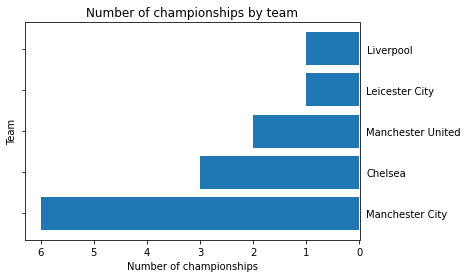

In [80]:
#groupby team and count the number of championships
champs = pos1.groupby('Team').size().reset_index(name='count')

#sort by the count of championships
champs = champs.sort_values(by='count', ascending=False)

#create a horizontal bar chart
plt.barh(champs['Team'], champs['count'])
plt.xlabel('Number of championships')
plt.ylabel('Team')
plt.title('Number of championships by team')

#if i wanna put Y legend in the right side
plt.gca().invert_xaxis()
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)

plt.show()

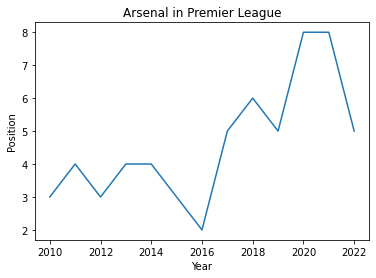

In [81]:
#Arsenal Path during the years
arsenal_data = PL[PL['Team'] == 'Arsenal']

plt.plot(arsenal_data['year'], arsenal_data['Pos'])
plt.xlabel('Year')
plt.ylabel('Position')
plt.title('Arsenal in Premier League')
plt.show()

### Question 2 - What were the winning teams and how was their path over the years?

In [82]:
#data
ChampionsPath = PL

In [83]:
#champions teams list
ChampionsTeams = ['Chelsea', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United']


In [84]:
#filter only the teams that won the premier league
ChampionsPath = ChampionsPath[ChampionsPath['Team'].isin(ChampionsTeams)]


In [85]:
#agrupar por ano e equipa e perceber a posição em cada ano
ChampionsGroup = ChampionsPath.groupby(['year', 'Team'])['Pos'].mean().reset_index()


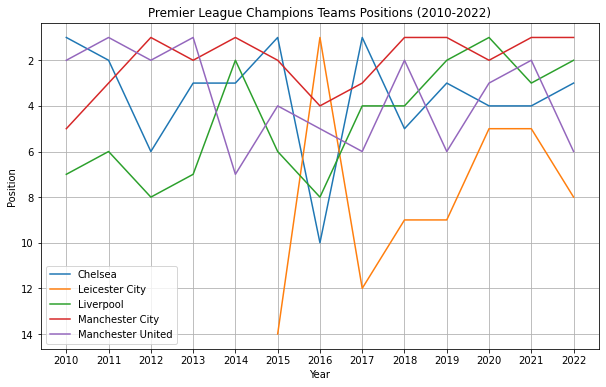

In [86]:
#plot
fig, ax = plt.subplots(figsize=(10, 6))

for team in ChampionsTeams:
    ChampionsGroupData = ChampionsGroup[ChampionsGroup['Team'] == team]
    ax.plot(ChampionsGroupData['year'], ChampionsGroupData['Pos'], label=team)

#range was being used so I had to import builtins to be able to reuse it
import builtins
range = builtins.range

ax.set_xticks(range(2010, 2023))
ax.set_xticklabels(range(2010, 2023))
ax.set_xlabel('Year')
ax.set_ylabel('Position')
ax.invert_yaxis()
ax.legend()
ax.grid(which='both')

ax.set_title('Premier League Champions Teams Positions (2010-2022)')

plt.show()

# City

In [87]:
#dictionary club and city
club_cities = {
    'Arsenal': 'Londres',
    'Aston Villa': 'Birmingham',
    'Birmingham City': 'Birmingham',
    'Blackburn Rovers': 'Blackburn',
    'Blackpool': 'Blackpool',
    'Bolton Wanderers': 'Bolton',
    'Bournemouth': 'Bournemouth',
    'Brentford': 'Londres',
    'Brighton & Hove Albion': 'Brighton',
    'Burnley': 'Burnley',
    'Cardiff City': 'Cardiff',
    'Chelsea': 'Londres',
    'Crystal Palace': 'Londres',
    'Everton': 'Liverpool',
    'Fulham': 'Londres',
    'Huddersfield Town': 'Huddersfield',
    'Hull City': 'Kingston upon Hull',
    'Leeds United': 'Leeds',
    'Leicester City': 'Leicester',
    'Liverpool': 'Liverpool',
    'Manchester City': 'Manchester',
    'Manchester United': 'Manchester',
    'Middlesbrough': 'Middlesbrough',
    'Newcastle United': 'Newcastle upon Tyne',
    'Norwich City': 'Norwich',
    'Portsmouth': 'Portsmouth',
    'Queens Park Rangers': 'Londres',
    'Reading': 'Reading',
    'Sheffield United': 'Sheffield',
    'Southampton': 'Southampton',
    'Stoke City': 'Stoke-on-Trent',
    'Sunderland': 'Sunderland',
    'Swansea City': 'Swansea',
    'Tottenham Hotspur': 'Londres',
    'Watford': 'Watford',
    'West Bromwich Albion': 'West Bromwich',
    'West Ham United': 'Londres',
    'Wigan Athletic': 'Wigan',
    'Wolverhampton Wanderers': 'Wolverhampton'
}

In [88]:
#dictionary keys
df_teams = pd.DataFrame(list(club_cities.keys()), columns=['Team'])

In [89]:
#dataframe with the first string of each value matching the dictionary
df_city = pd.DataFrame([city.split()[0] for city in club_cities.values() ], columns=['City'])

In [90]:
#merge both df
TeamCity = pd.merge(df_teams, df_city, left_index=True, right_index=True)

In [91]:
print(TeamCity)

                       Team            City
0                   Arsenal         Londres
1               Aston Villa      Birmingham
2           Birmingham City      Birmingham
3          Blackburn Rovers       Blackburn
4                 Blackpool       Blackpool
5          Bolton Wanderers          Bolton
6               Bournemouth     Bournemouth
7                 Brentford         Londres
8    Brighton & Hove Albion        Brighton
9                   Burnley         Burnley
10             Cardiff City         Cardiff
11                  Chelsea         Londres
12           Crystal Palace         Londres
13                  Everton       Liverpool
14                   Fulham         Londres
15        Huddersfield Town    Huddersfield
16                Hull City        Kingston
17             Leeds United           Leeds
18           Leicester City       Leicester
19                Liverpool       Liverpool
20          Manchester City      Manchester
21        Manchester United     

In [92]:
#create an empty list to store cities and clubs
city_list = []

for club in PL['Team']:
    city = club_cities[club]
    city_list.append(city)

#add "city" to db
PL['city'] = city_list

print(PL)

     year  Pos               Team   W   D   L   GF  GA   GD  Pts        city
0    2010    1            Chelsea  27   5   6  103  32  +71   86     Londres
1    2010    2  Manchester United  27   4   7   86  28  +58   85  Manchester
2    2010    3            Arsenal  23   6   9   83  41  +42   75     Londres
3    2010    4  Tottenham Hotspur  21   7  10   67  41  +26   70     Londres
4    2010    5    Manchester City  18  13   7   73  45  +28   67  Manchester
..    ...  ...                ...  ..  ..  ..  ...  ..  ...  ...         ...
255  2022   16            Everton  11   6  21   43  66  -23   39   Liverpool
256  2022   17       Leeds United   9  11  18   42  79  -37   38       Leeds
257  2022   18            Burnley   7  14  17   34  53  -19   35     Burnley
258  2022   19            Watford   6   5  27   34  77  -43   23     Watford
259  2022   20       Norwich City   5   7  26   23  84  -61   22     Norwich

[260 rows x 11 columns]


In [93]:
#order our columns
PL = PL[['year', 'Pos', 'Team', 'city', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

### Question 3 - How many teams are there per city?

In [94]:
#how many unique teams there are per city
PL.groupby('city')['Team'].nunique()

city
Birmingham             2
Blackburn              1
Blackpool              1
Bolton                 1
Bournemouth            1
Brighton               1
Burnley                1
Cardiff                1
Huddersfield           1
Kingston upon Hull     1
Leeds                  1
Leicester              1
Liverpool              2
Londres                8
Manchester             2
Middlesbrough          1
Newcastle upon Tyne    1
Norwich                1
Portsmouth             1
Reading                1
Sheffield              1
Southampton            1
Stoke-on-Trent         1
Sunderland             1
Swansea                1
Watford                1
West Bromwich          1
Wigan                  1
Wolverhampton          1
Name: Team, dtype: int64

In [95]:
#teams by year in PL
PL.groupby('year')['Team'].nunique()

year
2010    20
2011    20
2012    20
2013    20
2014    20
2015    20
2016    20
2017    20
2018    20
2019    20
2020    20
2021    20
2022    20
Name: Team, dtype: int64

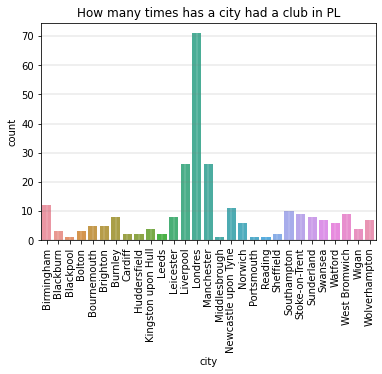

In [96]:
#how many times has a city had a club in PL
sorted_cities = PL['city'].sort_values()

ax = sns.countplot(x=sorted_cities, data=PL, orient='v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('How many times has a city had a club in PL')
ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.25)
ax.grid(axis='x', color='white', linestyle='-', linewidth=0.25)

plt.show()

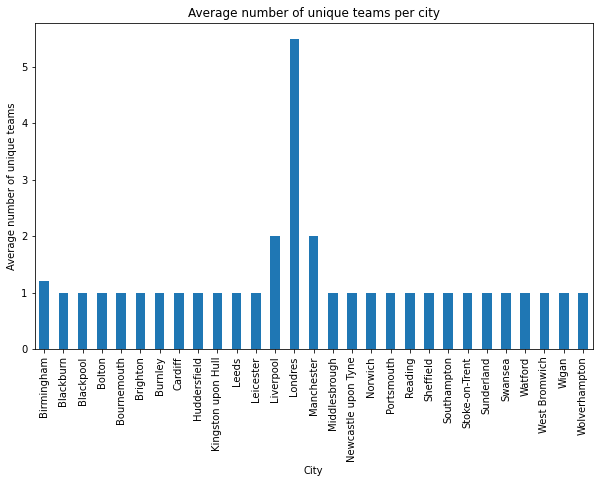

In [97]:
#average number of unique teams per city
data = PL.groupby(['year', 'city'])['Team'].nunique().groupby('city').mean().round(1)
data.plot(kind='bar', figsize=(10, 6))

plt.title('Average number of unique teams per city')
plt.xlabel('City')
plt.ylabel('Average number of unique teams')

plt.show()

In [98]:
#average number of unique teams per city
PL.groupby(['year', 'city'])['Team'].nunique().groupby('city').mean().round(1)

city
Birmingham             1.2
Blackburn              1.0
Blackpool              1.0
Bolton                 1.0
Bournemouth            1.0
Brighton               1.0
Burnley                1.0
Cardiff                1.0
Huddersfield           1.0
Kingston upon Hull     1.0
Leeds                  1.0
Leicester              1.0
Liverpool              2.0
Londres                5.5
Manchester             2.0
Middlesbrough          1.0
Newcastle upon Tyne    1.0
Norwich                1.0
Portsmouth             1.0
Reading                1.0
Sheffield              1.0
Southampton            1.0
Stoke-on-Trent         1.0
Sunderland             1.0
Swansea                1.0
Watford                1.0
West Bromwich          1.0
Wigan                  1.0
Wolverhampton          1.0
Name: Team, dtype: float64

In [99]:
#search city per team
city = PL.loc[PL['Team'] == 'Arsenal', 'city'].iloc[0]
print(city)

Londres


# Goals

In [100]:
#Arsenal goals per year
Arsenal_stats = PL.loc[PL['Team'] == 'Arsenal'].groupby('year')['GF'].sum()
Arsenal_total = pd.Series(Arsenal_stats.sum())

#concat both series in a dataframe
TeamXGoals = pd.concat([Arsenal_stats, Arsenal_total], axis=1)
TeamXGoals.columns = ['GF','Total']
TeamXGoals = TeamXGoals.fillna(0)
TeamXGoals = TeamXGoals.astype(int)
TeamXGoals.loc['Total'] = TeamXGoals.sum()

#delete "total" column
TeamXGoals = TeamXGoals.iloc[:,:-1]

#remove penultime row
penultimate_row_index = len(TeamXGoals) - 2
penultimate_row = TeamXGoals.iloc[[penultimate_row_index]]
TeamXGoals = TeamXGoals.drop(TeamXGoals.index[penultimate_row_index])

print(TeamXGoals)

        GF
2010    83
2011    72
2012    74
2013    72
2014    68
2015    71
2016    65
2017    77
2018    74
2019    73
2020    56
2021    55
2022    61
Total  901


In [101]:
Arsenal_stats = PL.loc[PL['Team'] == 'Arsenal'].groupby('year')['GF'].agg(['sum'])
Arsenal_stats.loc['Total'] = Arsenal_stats['sum'].sum()
print(Arsenal_stats)

       sum
year      
2010    83
2011    72
2012    74
2013    72
2014    68
2015    71
2016    65
2017    77
2018    74
2019    73
2020    56
2021    55
2022    61
Total  901


### Question 4 - How many goals did each team score?
#### The objective is also to understand the team that scored the most.

In [102]:
#team with more goals and total goals
most_goals_team = PL.groupby('Team')['GF'].sum().idxmax()
most_goals = PL.loc[PL['Team'] == most_goals_team, 'GF'].sum()
print(f"The team that scored the most goals was {most_goals_team}, they scored in total {most_goals} gols.")

The team that scored the most goals was Manchester City, they scored in total 1113 gols.


In [103]:
#goals per team
goals_by_team = PL.groupby("Team")["GF"].sum()
print(goals_by_team)

Team
Arsenal                     901
Aston Villa                 429
Birmingham City              75
Blackburn Rovers            135
Blackpool                    55
Bolton Wanderers            140
Bournemouth                 241
Brentford                    48
Brighton & Hove Albion      190
Burnley                     300
Cardiff City                 66
Chelsea                     928
Crystal Palace              387
Everton                     678
Fulham                      287
Huddersfield Town            50
Hull City                   142
Leeds United                104
Leicester City              466
Liverpool                   952
Manchester City            1113
Manchester United           897
Middlesbrough                27
Newcastle United            493
Norwich City                209
Portsmouth                   34
Queens Park Rangers         115
Reading                      43
Sheffield United             59
Southampton                 480
Stoke City                  360
Sun

# Descriptive Analisys

####Average (mean): is the sum of all values divided by the number of values.

####Median (median): is the value that is in the middle of the data set when they are arranged in ascending or descending order.

####Standard deviation (std): is a measure of dispersion that indicates how far the values are from the mean. A high standard deviation value indicates that the values are more spread out, while a low value indicates that the values are closer to the mean.

####Minimum value (min): is the smallest value in the dataset.

####Maximum value (max): is the largest value in the dataset.

In [104]:
#calculate mean, media, std , min and max for each team in PL dataset 
team_stats = PL.groupby("Team").agg({
    "Pts": ["mean", "median", "std", "min", "max"],
    "W": ["mean", "median", "std", "min", "max"],
    "L": ["mean", "median", "std", "min", "max"],
    "D": ["mean", "median", "std", "min", "max"],
    "GF": ["mean", "median", "std", "min", "max"],
    "GA": ["mean", "median", "std", "min", "max"]
})

In [105]:
team_stats.dropna(inplace=True)

In [106]:
print(team_stats)

                               Pts                                     W  \
                              mean median        std min  max       mean   
Team                                                                       
Arsenal                  69.615385   70.0   6.423115  56   79  20.538462   
Aston Villa              41.900000   39.5  12.564942  17   64  10.700000   
Birmingham City          44.500000   44.5   7.778175  39   50  10.500000   
Blackburn Rovers         41.333333   43.0   9.609024  31   50  10.666667   
Bolton Wanderers         40.333333   39.0   5.131601  36   46  10.666667   
Bournemouth              42.200000   44.0   4.816638  34   46  11.200000   
Brighton & Hove Albion   41.800000   41.0   5.540758  36   51   9.600000   
Burnley                  40.625000   39.5   8.975164  30   54  10.375000   
Cardiff City             32.000000   32.0   2.828427  30   34   8.500000   
Chelsea                  73.615385   72.0  11.383749  50   93  21.769231   
Crystal Pala

In [107]:
#Arsenal stats
team_stats.loc["Arsenal"]

Pts  mean      69.615385
     median    70.000000
     std        6.423115
     min       56.000000
     max       79.000000
W    mean      20.538462
     median    21.000000
     std        2.633609
     min       14.000000
     max       24.000000
L    mean       9.461538
     median     9.000000
     std        2.331501
     min        7.000000
     max       13.000000
D    mean       8.000000
     median     7.000000
     std        2.886751
     min        3.000000
     max       14.000000
GF   mean      69.307692
     median    72.000000
     std        8.127983
     min       55.000000
     max       83.000000
GA   mean      43.384615
     median    43.000000
     std        5.560852
     min       36.000000
     max       51.000000
Name: Arsenal, dtype: float64

In [108]:
#top 3 of each variable per team
team_stats = PL.groupby("Team").agg({
    "Pts": lambda x: x.nlargest(3).tolist(),
    "W": lambda x: x.nlargest(3).tolist(),
    "L": lambda x: x.nsmallest(3).tolist(),
    "D": lambda x: x.nlargest(3).tolist(),
    "GF": lambda x: x.nlargest(3).tolist(),
    "GA": lambda x: x.nsmallest(3).tolist()
})

In [109]:
print(team_stats)

                                   Pts             W             L  \
Team                                                                 
Arsenal                   [79, 75, 75]  [24, 23, 23]     [7, 7, 7]   
Aston Villa               [64, 55, 48]  [17, 16, 13]   [8, 14, 14]   
Birmingham City               [50, 39]       [13, 8]      [14, 15]   
Blackburn Rovers          [50, 43, 31]   [13, 11, 8]  [14, 17, 23]   
Blackpool                         [39]          [10]          [19]   
Bolton Wanderers          [46, 39, 36]  [12, 10, 10]  [16, 19, 22]   
Bournemouth               [46, 45, 44]  [13, 12, 11]  [16, 16, 18]   
Brentford                         [46]          [13]          [18]   
Brighton & Hove Albion    [51, 41, 41]    [12, 9, 9]  [11, 15, 15]   
Burnley                   [54, 54, 40]  [15, 14, 11]  [12, 14, 17]   
Cardiff City                  [34, 30]       [10, 7]      [22, 24]   
Chelsea                   [93, 87, 86]  [30, 27, 26]     [3, 5, 6]   
Crystal Palace      

# Points

In [110]:
#top20 teams with the most points added
df = PL

#group the data of the teams and add up the points
df_points = df.groupby('Team')['Pts'].sum().reset_index()

#sort teams by points in descending order and displaying the top 20
df_points = df_points.sort_values(by='Pts', ascending=False).reset_index(drop=True)
print(df_points.head(39))

                       Team   Pts
0           Manchester City  1072
1                   Chelsea   957
2         Manchester United   957
3                 Liverpool   948
4                   Arsenal   905
5         Tottenham Hotspur   902
6                   Everton   711
7           West Ham United   562
8          Newcastle United   504
9               Southampton   476
10           Leicester City   445
11              Aston Villa   419
12               Stoke City   412
13           Crystal Palace   404
14     West Bromwich Albion   368
15                  Burnley   325
16  Wolverhampton Wanderers   315
17               Sunderland   314
18             Swansea City   312
19                   Fulham   276
20                  Watford   233
21              Bournemouth   211
22   Brighton & Hove Albion   209
23             Norwich City   201
24           Wigan Athletic   157
25                Hull City   136
26         Blackburn Rovers   124
27         Bolton Wanderers   121
28            

In [111]:
df = PL

#group by team and add up the points
df_points = df.groupby('Team')['Pts'].sum().reset_index()

bins = [0, 300, 600, 1000, float('inf')]
labels = ['0-300', '301-600', '601-1000', '1001+']

#create a new column in the database with the category of points for each team
df_points['intervalo'] = pd.cut(df_points['Pts'], bins=bins, labels=labels)

for intervalo, group in df_points.groupby('intervalo'):
    print(f"Teams with scores between {intervalo}:")
    print(group['Team'].to_list())

Teams with scores between 0-300:
['Birmingham City', 'Blackburn Rovers', 'Blackpool', 'Bolton Wanderers', 'Bournemouth', 'Brentford', 'Brighton & Hove Albion', 'Cardiff City', 'Fulham', 'Huddersfield Town', 'Hull City', 'Leeds United', 'Middlesbrough', 'Norwich City', 'Portsmouth', 'Queens Park Rangers', 'Reading', 'Sheffield United', 'Watford', 'Wigan Athletic']
Teams with scores between 301-600:
['Aston Villa', 'Burnley', 'Crystal Palace', 'Leicester City', 'Newcastle United', 'Southampton', 'Stoke City', 'Sunderland', 'Swansea City', 'West Bromwich Albion', 'West Ham United', 'Wolverhampton Wanderers']
Teams with scores between 601-1000:
['Arsenal', 'Chelsea', 'Everton', 'Liverpool', 'Manchester United', 'Tottenham Hotspur']
Teams with scores between 1001+:
['Manchester City']


### Question 5 - What is the variable that most influences the increase in points?


###Explanation
- A angular coefficient of 0.89 indicates a strong positive relationship between the Pts and GF variables. This means that an increase in GF is associated with an increase in Pts. The coefficient value indicates that, on average, an increase of one unit in GF is associated with an increase of 0.89 units in Pts.

- A linear coefficient of 5.71 means that when the independent variable (GF) is equal to zero, the dependent variable (Pts) has an initial value of 5.71. This can be interpreted as a sort of "base score" or "minimum score" for a team that has not scored a single goal during the season.

- An R² value of 0.97 indicates that the linear relationship between GF and Pts is very strong, as about 97% of the variation in Pts can be explained by the variation in GF. This suggests that the GF variable is a good predictor of the Pts variable and that linear regression is a good choice for modeling the relationship between the two variables.

In [112]:
PtsW = PL

# variables of interest
X = PtsW['Pts'].values.reshape(-1, 1)
y = PtsW['W'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: 0.35
Linear coefficient: -3.77
R²: 0.97


In [113]:
PtsD = PL

#variables of interest
X = PtsD['Pts'].values.reshape(-1, 1)
y = PtsD['D'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: -0.04
Linear coefficient: 11.54
R²: 0.07


In [114]:
PtsL = PL

#variables of interest
X = PtsL['Pts'].values.reshape(-1, 1)
y = PtsL['L'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: -0.30
Linear coefficient: 30.23
R²: 0.89


In [115]:
PtsGF = PL

# variables of interest
X = PtsGF['Pts'].values.reshape(-1, 1)
y = PtsGF['GF'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: 0.89
Linear coefficient: 5.71
R²: 0.84


In [116]:
PtsGD = PL

#variables of interest
X = PtsGD['Pts'].values.reshape(-1, 1)
y = PtsGD['GD'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: 1.52
Linear coefficient: -79.58
R²: 0.93


In [117]:
PtsGA = PL

#variables of interest
X = PtsGA['Pts'].values.reshape(-1, 1)
y = PtsGA['GA'].values

#fit linear regression
reg = LinearRegression().fit(X, y)

r_squared = reg.score(X, y)
print(f"Angular coefficient: {reg.coef_[0]:.2f}")
print(f"Linear coefficient: {reg.intercept_:.2f}")
print(f"R²: {r_squared:.2f}")

Angular coefficient: -0.63
Linear coefficient: 85.29
R²: 0.71


- We can see from R² that what has the greatest influence on the increase in points will be the number of victories, with a very strong ratio of 97%, then with GD with a ratio of 93%, L with a ratio of 89%, GF with a ratio of 84%, AD with 71% and with a lower ratio we will have the variable D.

# Final Considerations

####During the decade between 2010 and 2022, the Premier League established itself as the richest and most competitive football league in the world, with some of the sport's most talented and iconic players and managers. Since the rise of Manchester City under manager Pep Guardiola, the league has seen a huge shift in the balance of power, with City, Liverpool, Chelsea and United emerging as the main contenders for the title, not forgetting the unforgettable Leicester.
####However, the Premier League has also faced challenges such as the COVID-19 pandemic which has affected the league calendar, and issues around racism and diversity in football, leading to important actions and campaigns to promote inclusion and equality.
####Overall, the Premier League has continued to be one of the world's most exciting and unpredictable competitions, attracting fans from far and wide and establishing itself as a mainstay of global football.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdPnJJH_nfnmGbnI6erZ942vMsWlOyB--HYIiDnlnzi1-jqvvseJlotPuXEw5rmVpNK5I&usqp=CAU">